# 지표 설명
## 주가
* SAMSUNG: 삼성 주가
* NDAQ: 나스닥 지수
* HSI	: 항셍 지수
* KOSPI: 코스피
* N225: 니케이225
* SOX	: 필라델피아 반도체 지수

## 채권
* KR_3year_yield(%): 국채 3년물 수익률	
* US_10year_yeild(%): 미국 재무성 채권 10년물 수익률 

## 원자재
* Gold : 금 현물 시세(달러 표기)
* Dubai(BPD) : 두바이유(배럴 당 달러) - 한국석유공사 공시 자료
* Brent(BPD): 브렌트유(배럴 당 달러) - 한국석유공사 공시 자료
* WTI(BPD): 서부 텍사스유(배럴 당 달러) -한국석유공사 공시 자료
    - 한국 석유공사가 국제 원유 현물 가격을 공시하는데 해당 가격은 미국의 Mcgraw Hill사가 운영하는 Platt's에서 전세계 현물 거래 정보를 수집하여 고유 가격 산정 방식에 따라서 적당한 당일 평가 가격을 게시하고 이 자료를 그대로 올리고 있다.-> 산업통상자원부 자료 참조
    - 금 지수는 2,4,6,8,10월 중 해당 날짜에서 가장 가까운 만기의 선물 가격을 고시하고 있음 ->CME(시카고 상품 거래소)

## 환율
* JPY(1YEN): 1엔당 원	
* USD: 1달러 당 원


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

total_index = pd.read_csv('2019_2021 자산지수.csv')
total_index = total_index.set_index('Date')
total_index



,SAMSUNG,NDAQ,HSI,KOSPI,N225,SOX,KR_3year_yield(%),US_10year_yeild(%),Gold($),Dubai(BPD),Brent(BPD),WTI(BPD),JPY(1YEN),USD(1$)
Date,,,,,,,,,,,,,,
2019-01-02,35331.625000,76.962700,25130.349609,2010.000000,19691.334821,1165.300049,1.8020,2.633,1281.000000,51.860,54.91,46.540,10.150000,1113.800049
2019-01-03,34283.078125,74.891357,25064.359375,1993.699951,19626.647879,1096.030029,1.7960,2.552,1291.800049,53.200,55.95,47.090,10.443000,1122.180054
2019-01-04,34146.316406,77.865349,25626.029297,2010.250000,19561.960938,1143.959961,1.7970,2.668,1282.699951,55.590,57.06,47.960,10.422000,1124.119995
2019-01-07,35331.625000,75.832016,25835.699219,2037.099976,20038.970703,1166.239990,1.8042,2.698,1286.800049,56.790,57.33,48.520,10.265000,1114.400024
2019-01-08,34738.968750,75.613487,25875.449219,2025.270020,20204.039062,1160.550049,1.8066,2.730,1283.199951,56.180,58.72,49.780,10.278000,1116.400024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,80138.101562,205.649494,23223.759766,3012.429932,28782.589844,3959.169922,1.7980,1.489,1810.424957,74.370,76.14,74.235,10.357149,1185.500000
2021-12-27,79839.453125,208.310944,23266.360352,2999.550049,28676.460938,4039.510010,1.7760,1.477,1808.099976,75.945,78.60,75.570,10.363698,1185.920044
2021-12-28,79939.000000,209.058533,23280.560547,3020.239990,29069.160156,3992.189941,1.7860,1.484,1810.199951,76.470,78.94,75.980,10.334326,1185.650024


# 데이터 스케일링 및 분석
## 스케일링, feature, target 구분
* 스케일링 종류
    - standard
    - minmax
    - log
    - log1p
* 종속변수(target): 삼성전자
* 독립변수(feature): 그외 전부로 일단 설정

In [2]:
# feature, target 구분
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

log_df = np.log(total_index)
log_df.fillna(0,inplace=True)

log1_df = np.log1p(total_index)
log1_df.fillna(0,inplace=True)

standard = StandardScaler()
minmax = MinMaxScaler()

standard_scale = standard.fit_transform(total_index)
minmax_scale = minmax.fit_transform(total_index)

standard_df = pd.DataFrame(standard_scale,columns=total_index.columns,index=total_index.index)
minmax_df = pd.DataFrame(minmax_scale,columns=total_index.columns,index=total_index.index)


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [3]:
features=total_index.loc[:,'NDAQ':]
target = total_index['SAMSUNG']


standard_df_features = standard_df.loc[:,'NDAQ':]
standard_df_target = standard_df['SAMSUNG']


minmax_df_features = minmax_df.loc[:,'NDAQ':]
minmax_df_target = minmax_df['SAMSUNG']


log_df_features = log_df.loc[:,'NDAQ':]
log_df_target = log_df['SAMSUNG']


log1_df_features = log1_df.loc[:,'NDAQ':]
log1_df_target = log1_df['SAMSUNG']

Text(0.5, 1.0, 'log1 scale')

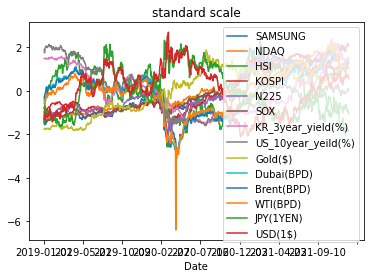

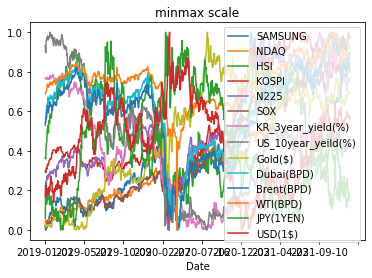

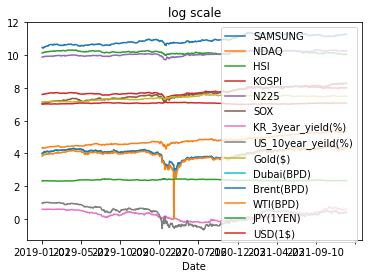

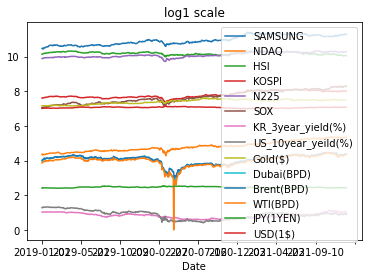

In [4]:
# 스케일링 데이터 시각화
standard_df.plot()
plt.title('standard scale')

minmax_df.plot()
plt.title('minmax scale')

log_df.plot()
plt.title('log scale')

log1_df.plot()
plt.title('log1 scale')

## 데이터 분석
### 분포

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


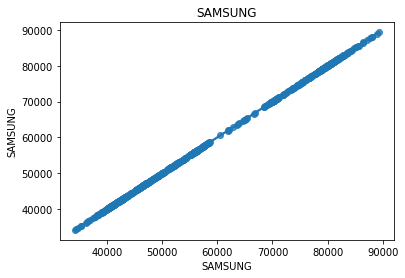

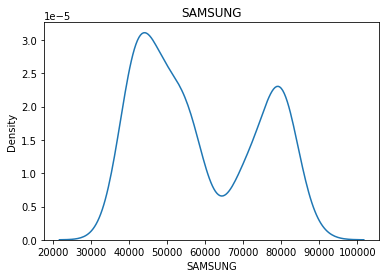

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


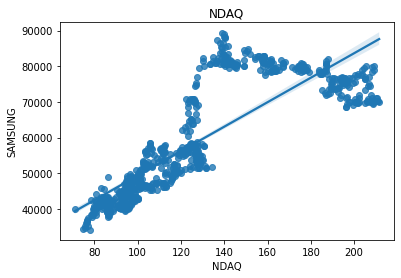

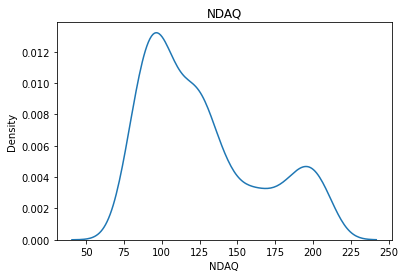

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


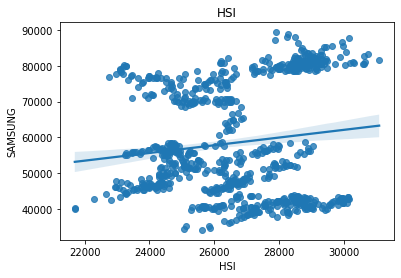

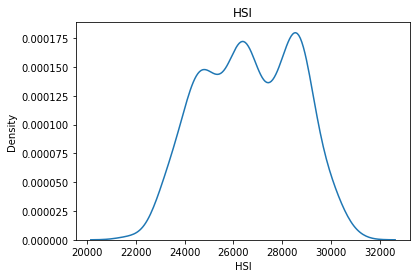

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


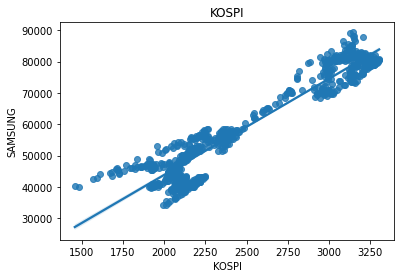

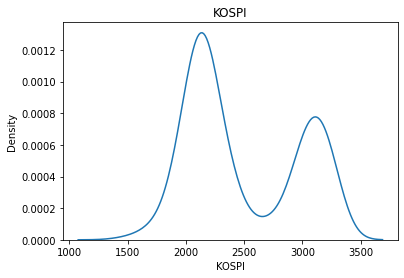

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


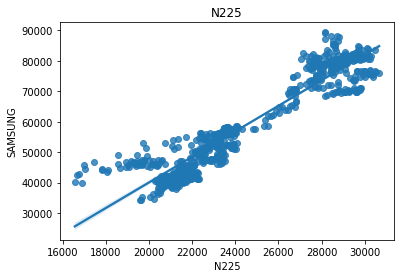

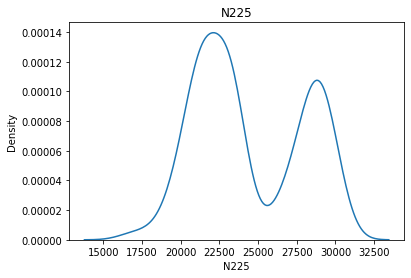

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


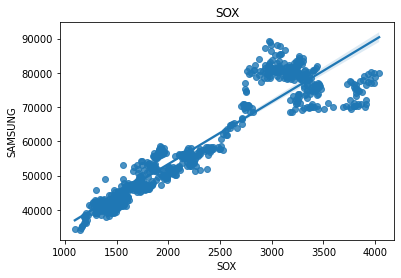

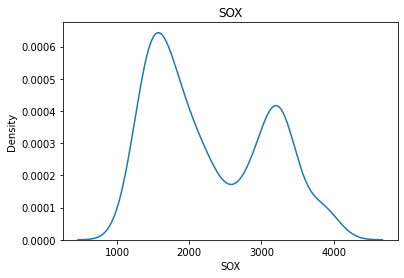

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


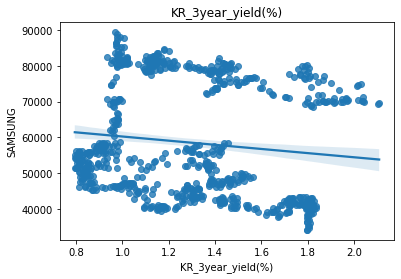

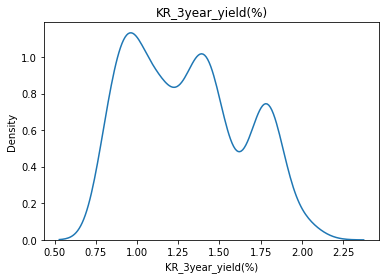

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


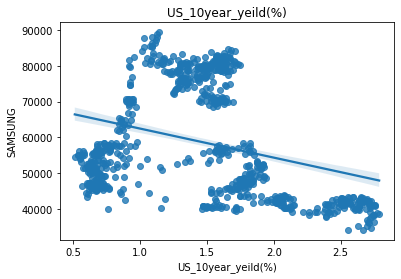

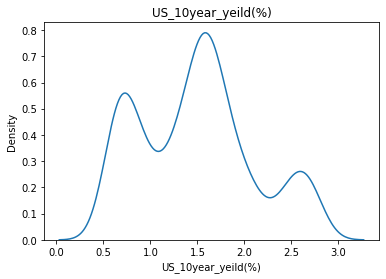

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


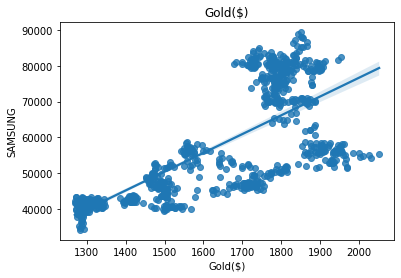

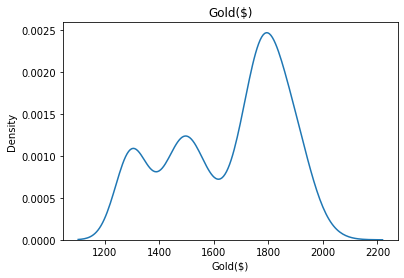

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


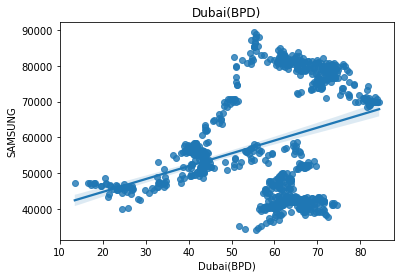

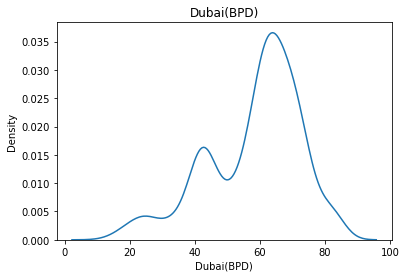

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


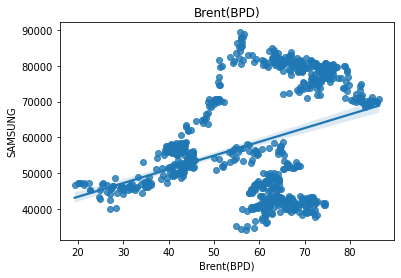

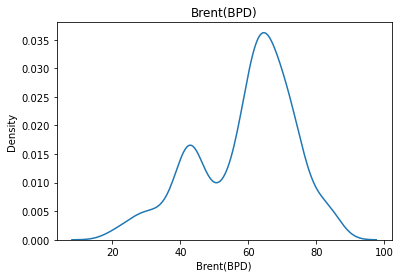

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


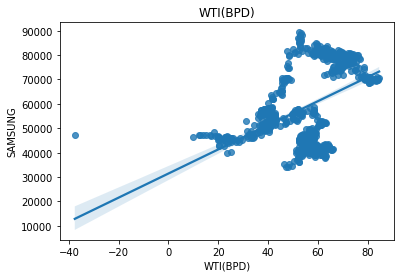

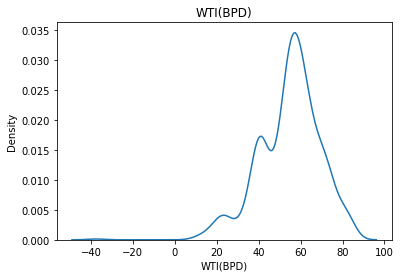

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


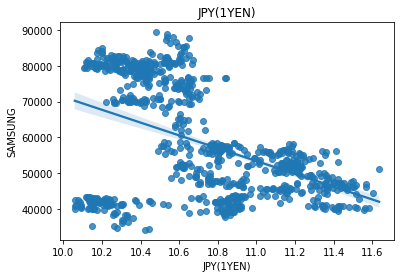

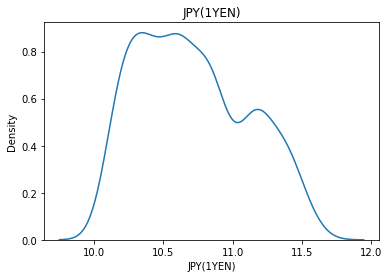

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


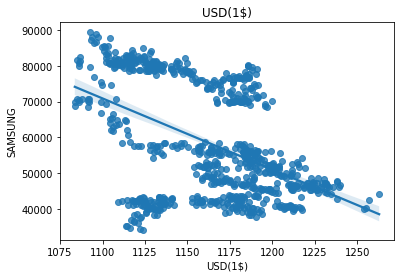

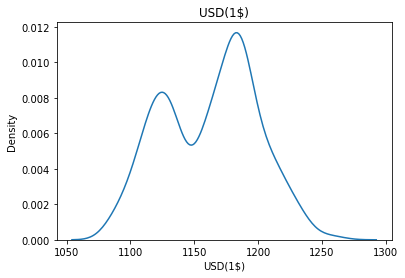

In [5]:
 

# def scatter(df):
#     for i in df.columns:
#         plt.scatter(df[i],target)
#         plt.title(i)
#         plt.show()

def scatter(df):
    for i in df.columns:
        sns.regplot(df[i],target)
        plt.title(i)
        plt.show()  
         
        sns.kdeplot(df[i])
        plt.title(i)
        plt.show()

        
scatter(total_index)

## 데이터 간의 상관관계
* 비슷한 자산군별로 상관관계가 매우 높게 나타났지만
* 항셍지수의 경우 다른 주식지수와의 상관관계가 매우 낮았다. 
* 금의 경우 원유보다는 주식에 강한 양의 상관관계가 나타나고
* 금은 채권과 강한 음의 상관관계가 나타났다.
* 자산간 상관관계가 크기 때문에 다중회귀 진행시 다중공선성 문제 발생이 예상된다.
-> 이것들의 이유가 필요할 것 같다.

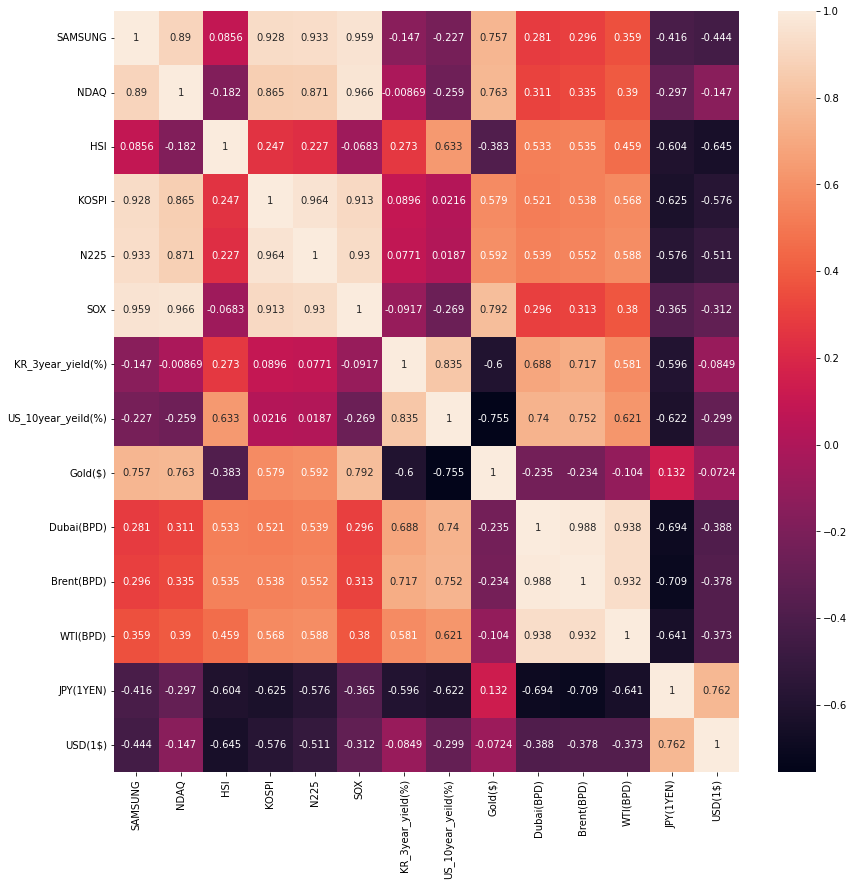

In [6]:
from sklearn.metrics import accuracy_score
import seaborn as sns

# total_index.corr()
# standard_df.corr()
# minmax_df.corr()
# log_df.corr()
# log1_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(log_df.corr(),annot=True, fmt='.3g')
plt.show()

# 독립변수 선정
* 데이터: log scaling이 진행된 데이터
## 파라미터 조정 없이 회귀 모델을 돌려서 회귀계수가 높은 것을 선정

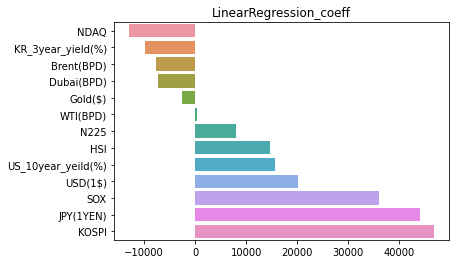

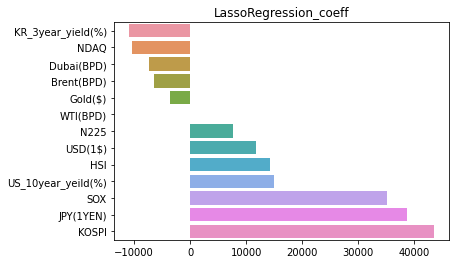

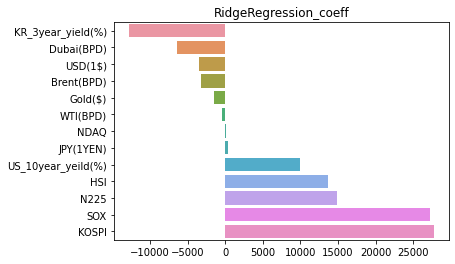

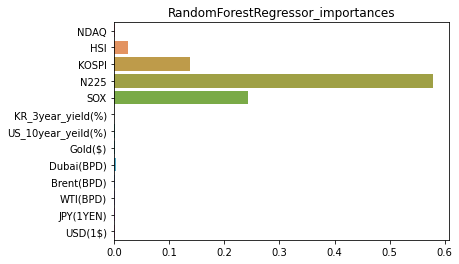

In [7]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns

# 선형, 라쏘, 릿지, 랜덤포레스트 모형 생성, 학습
lr_reg = LinearRegression()
lasso_reg = Lasso()
ridge_reg = Ridge()
random_reg = RandomForestRegressor()

lr_reg.fit(log1_df_features,target)
lasso_reg.fit(log1_df_features,target)
ridge_reg.fit(log1_df_features,target)
random_reg.fit(log1_df_features,target)



# 모형별 독립변수 중요도 시각화
coeff = pd.Series(data=lr_reg.coef_,index=features.columns)
coeff = coeff.sort_values(ascending=True)
sns.barplot(x=coeff.values,y=coeff.index)
plt.title('LinearRegression_coeff')
plt.show()

coeff = pd.Series(data=lasso_reg.coef_,index=features.columns)
coeff = coeff.sort_values(ascending=True)
sns.barplot(x=coeff.values,y=coeff.index)
plt.title('LassoRegression_coeff')
plt.show()

coeff = pd.Series(data=ridge_reg.coef_,index=features.columns)
coeff = coeff.sort_values(ascending=True)
sns.barplot(x=coeff.values,y=coeff.index)
plt.title('RidgeRegression_coeff')
plt.show()

sns.barplot(x=random_reg.feature_importances_,y=features.columns)
plt.title('RandomForestRegressor_importances')
plt.show()

## 상관관계에 따른 차원축소
1. 전체 자산군을 4개로 차원축소 (전체 자산군이 4개로 나누어져 있어서)

* 항셍지수는 종속변수인 삼성전자와의 상관관계가 낮기에 독립변수 선정에서 제외하고 이하의 방법을 사용한다.
2. 개별 자산군별 차원축소(주식, 채권, 원자재, 외환)

3. 금의 별도 취급

    1) 금: 원자재와의 상관관계가 낮고 주식과 채권과의 상관관계가 크다.
        (3) 금과 주식을 합쳐서 차원축소를 진행한다.
        (4) 금과 채권을 합쳐서 차원축소를 진행한다.
        (5) 별도의 자산군으로 분류하여 5개의 차원축소를 진행한다.
        
6) 삼성전자와의 상관관계가 0.3 이하인 자산군을 제외하고 자산군 별로 차원축소 진행

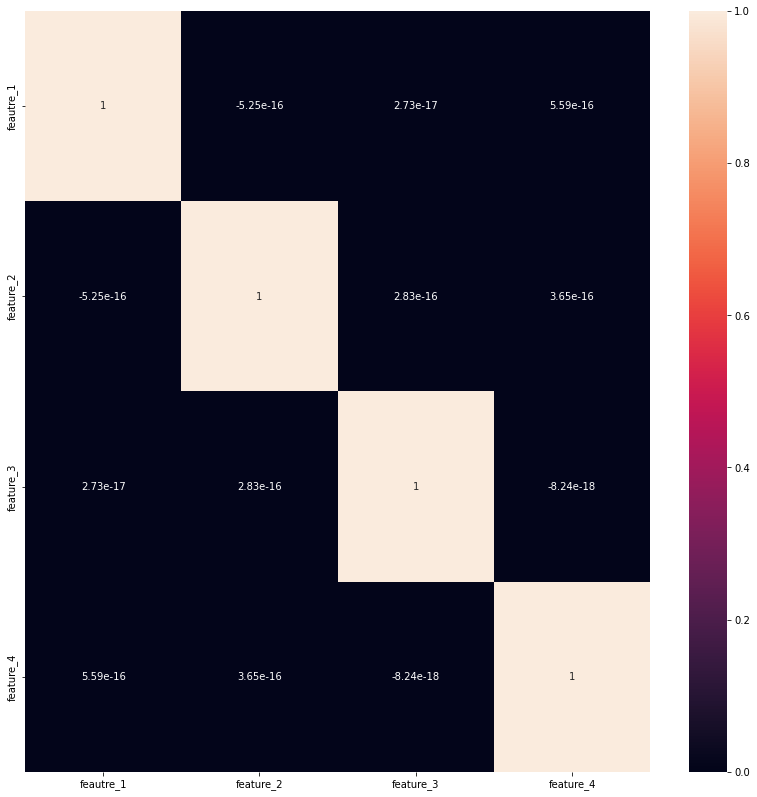

In [8]:
from sklearn.decomposition import PCA
import pandas as pd
# 1번: 전체 자산군을 4개로 차원축소 (전체 자산군이 4개로 나누어져 있어서)

pca_1 = PCA(n_components=4)
pca_1 = pca_1.fit_transform(log1_df_features)
pca_1 = pd.DataFrame(pca_1, columns=['feautre_1','feature_2','feature_3','feature_4'],index=log_df_features.index)


plt.figure(figsize=(14,14))
sns.heatmap(pca_1.corr(),annot=True, fmt='.3g')
plt.show()

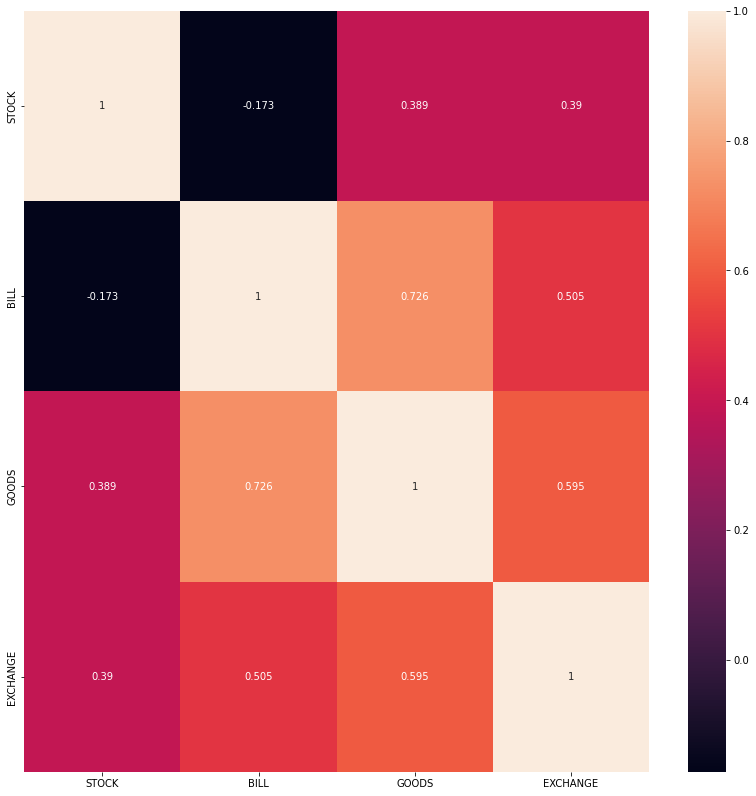

In [9]:
from sklearn.decomposition import PCA
import pandas as pd
# 2번: 개별 자산군별 차원축소(주식, 채권, 원자재, 외환)



#주식 차원축소
pca_2_stock = PCA(n_components=1)
pca_2_stock = pca_2_stock.fit_transform(log_df_features.loc[:,'NDAQ':'SOX'].drop('HSI',axis=1))
pca_2_stock = pd.DataFrame(pca_2_stock,columns=['STOCK'],index=log_df_features.index)

#채권 차원축소
pca_2_bill = PCA(n_components=1)
pca_2_bill = pca_2_bill.fit_transform(log_df_features.loc[:,'KR_3year_yield(%)':'US_10year_yeild(%)'])
pca_2_bill = pd.DataFrame(pca_2_bill,columns=['BILL'],index=log_df_features.index)

# 원자재 차원 축소
pca_2_goods = PCA(n_components=1)
pca_2_goods = pca_2_goods.fit_transform(log_df_features.loc[:,'Gold($)':'WTI(BPD)'])
pca_2_goods = pd.DataFrame(pca_2_goods,columns=['GOODS'],index=log_df_features.index)

# 환율 차원축소
pca_2_exchange = PCA(n_components=1)
pca_2_exchange = pca_2_exchange.fit_transform(log_df_features.loc[:,'JPY(1YEN)':'USD(1$)'])
pca_2_exchange = pd.DataFrame(pca_2_exchange,columns=['EXCHANGE'],index=log_df_features.index)


pca_2 = pd.concat([pca_2_stock,pca_2_bill,pca_2_goods,pca_2_exchange],axis=1)
pca_2

plt.figure(figsize=(14,14))
sns.heatmap(pca_2.corr(),annot=True, fmt='.3g')
plt.show()

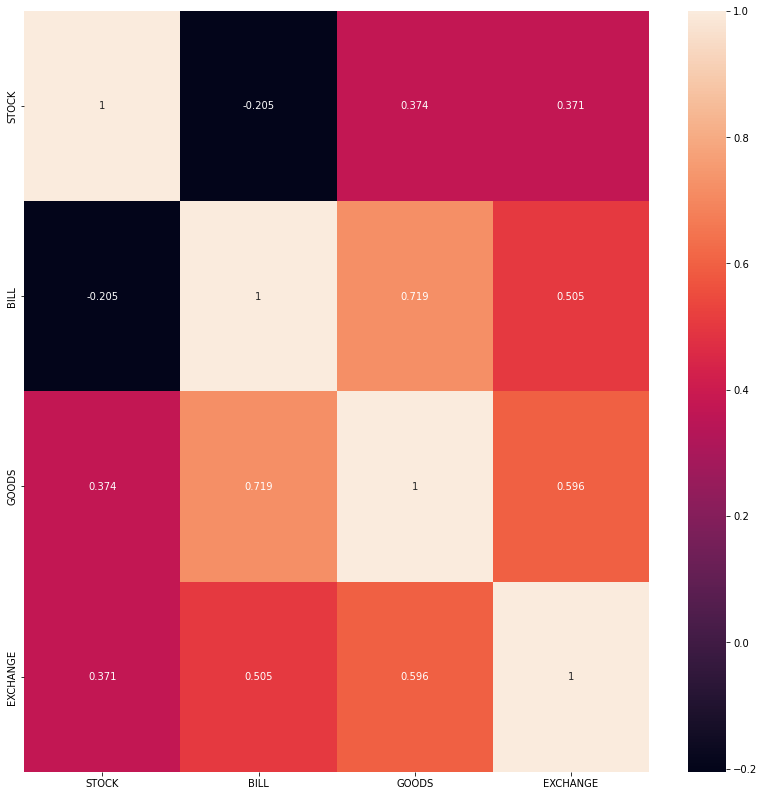

In [10]:
from sklearn.decomposition import PCA
import pandas as pd
# (3) 금과 주식을 합쳐서 차원축소를 진행한다.



#주식 차원축소
pca_3_stock = PCA(n_components=1)
pca_3_stock = pca_3_stock.fit_transform(log_df_features[['NDAQ','KOSPI','N225','SOX','Gold($)']])
pca_3_stock = pd.DataFrame(pca_3_stock,columns=['STOCK'],index=log_df_features.index)


#채권 차원축소
pca_3_bill = PCA(n_components=1)
pca_3_bill = pca_3_bill.fit_transform(log_df_features.loc[:,'KR_3year_yield(%)':'US_10year_yeild(%)'])
pca_3_bill = pd.DataFrame(pca_3_bill,columns=['BILL'],index=log_df_features.index)

# 원자재 차원 축소
pca_3_goods = PCA(n_components=1)
pca_3_goods = pca_3_goods.fit_transform(log_df_features.loc[:,'Dubai(BPD)':'WTI(BPD)'])
pca_3_goods = pd.DataFrame(pca_3_goods,columns=['GOODS'],index=log_df_features.index)

# 환율 차원축소
pca_3_exchange = PCA(n_components=1)
pca_3_exchange = pca_3_exchange.fit_transform(log_df_features.loc[:,'JPY(1YEN)':'USD(1$)'])
pca_3_exchange = pd.DataFrame(pca_3_exchange,columns=['EXCHANGE'],index=log_df_features.index)


pca_3 = pd.concat([pca_3_stock,pca_3_bill,pca_3_goods,pca_3_exchange],axis=1)
pca_3



plt.figure(figsize=(14,14))
sns.heatmap(pca_3.corr(),annot=True, fmt='.3g')
plt.show()

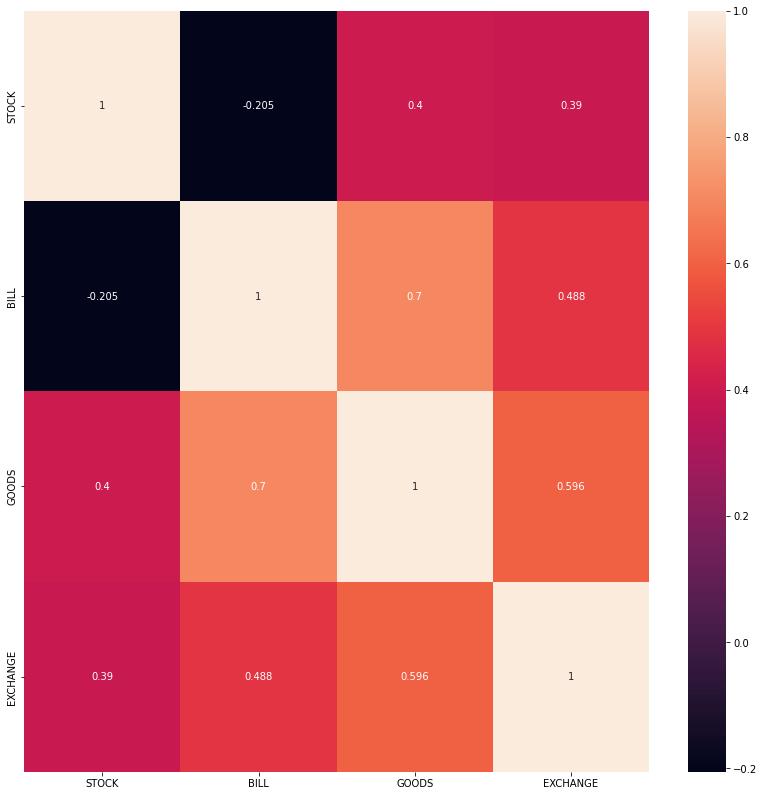

In [11]:
from sklearn.decomposition import PCA
import pandas as pd
# (4) 금과 채권을 합쳐서 차원축소를 진행한다.



#주식 차원축소
pca_4_stock = PCA(n_components=1)
pca_4_stock = pca_4_stock.fit_transform(log_df_features.loc[:,'NDAQ':'SOX'].drop('HSI',axis=1))
pca_4_stock = pd.DataFrame(pca_4_stock,columns=['STOCK'],index=log_df_features.index)


#채권 차원축소
pca_4_bill = PCA(n_components=1)
pca_4_bill = pca_4_bill.fit_transform(log_df_features[['KR_3year_yield(%)','US_10year_yeild(%)','Gold($)']])
pca_4_bill = pd.DataFrame(pca_4_bill,columns=['BILL'],index=log_df_features.index)

# 원자재 차원 축소
pca_4_goods = PCA(n_components=1)
pca_4_goods = pca_4_goods.fit_transform(log_df_features.loc[:,'Dubai(BPD)':'WTI(BPD)'])
pca_4_goods = pd.DataFrame(pca_4_goods,columns=['GOODS'],index=log_df_features.index)

# 환율 차원축소
pca_4_exchange = PCA(n_components=1)
pca_4_exchange = pca_4_exchange.fit_transform(log_df_features.loc[:,'JPY(1YEN)':'USD(1$)'])
pca_4_exchange = pd.DataFrame(pca_4_exchange,columns=['EXCHANGE'],index=log_df_features.index)


pca_4 = pd.concat([pca_4_stock,pca_4_bill,pca_4_goods,pca_4_exchange],axis=1)
pca_4


plt.figure(figsize=(14,14))
sns.heatmap(pca_4.corr(),annot=True, fmt='.3g')
plt.show()

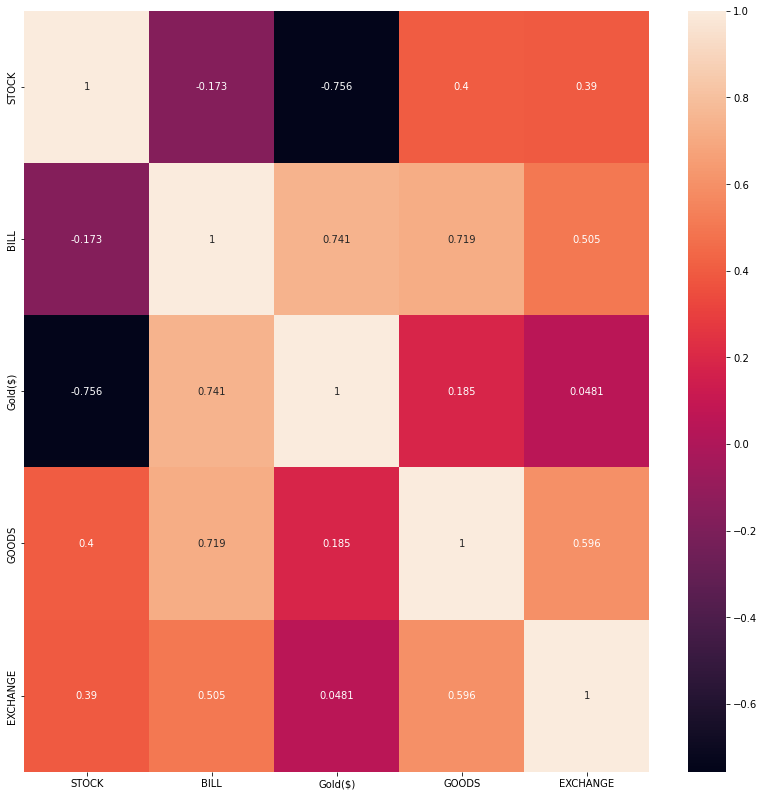

In [12]:
from sklearn.decomposition import PCA
import pandas as pd
#  (5) 별도의 자산군으로 분류하여 개별 자산군의 차원 축소 진행 후 데이터 프레임 결합.

#주식 차원축소
pca_5_stock = PCA(n_components=1)
pca_5_stock = pca_5_stock.fit_transform(log_df_features.loc[:,'NDAQ':'SOX'].drop('HSI',axis=1))
pca_5_stock = pd.DataFrame(pca_5_stock,columns=['STOCK'],index=log_df_features.index)


#채권 차원축소
pca_5_bill = PCA(n_components=1)
pca_5_bill = pca_5_bill.fit_transform(log_df_features.loc[:,'KR_3year_yield(%)':'US_10year_yeild(%)'])
pca_5_bill = pd.DataFrame(pca_5_bill,columns=['BILL'],index=log_df_features.index)

# 원자재 차원 축소
pca_5_goods = PCA(n_components=1)
pca_5_goods = pca_5_goods.fit_transform(log_df_features.loc[:,'Dubai(BPD)':'WTI(BPD)'])
pca_5_goods = pd.DataFrame(pca_5_goods,columns=['GOODS'],index=log_df_features.index)

# 환율 차원축소
pca_5_exchange = PCA(n_components=1)
pca_5_exchange = pca_5_exchange.fit_transform(log_df_features.loc[:,'JPY(1YEN)':'USD(1$)'])
pca_5_exchange = pd.DataFrame(pca_5_exchange,columns=['EXCHANGE'],index=log_df_features.index)


pca_5 = pd.concat([pca_5_stock,pca_5_bill,log1_df_features['Gold($)'],pca_5_goods,pca_5_exchange],axis=1)
pca_5


plt.figure(figsize=(14,14))
sns.heatmap(pca_5.corr(),annot=True, fmt='.3g')
plt.show()

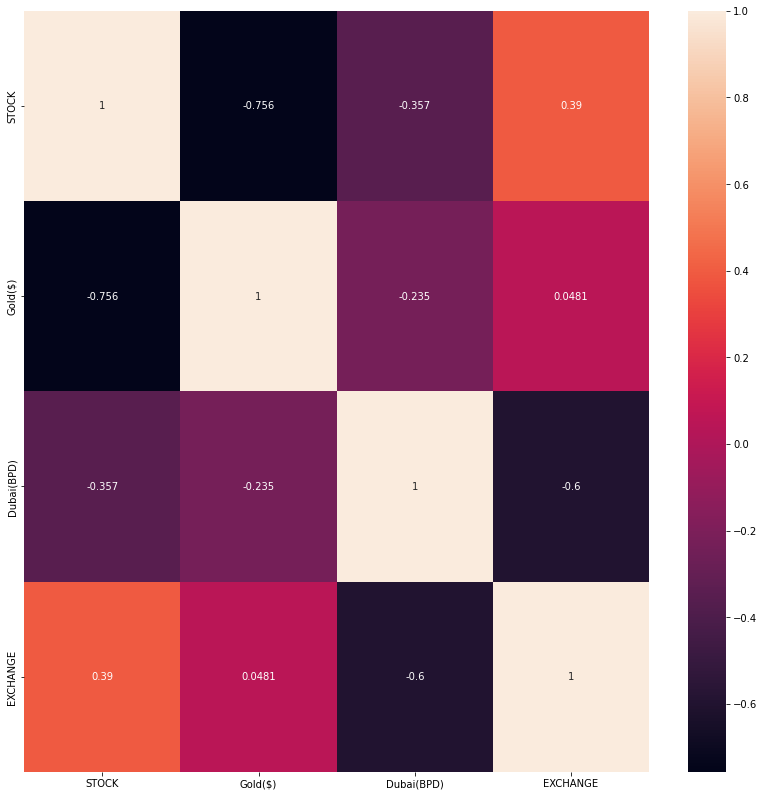

In [13]:
#6) 삼성전자와의 상관관계가 0.3 이하인 자산군을 제외하고 자산군 별로 차원축소 진행
# 제외 변수: 항셍, 채권 ,두바이유,브렌트유

#주식 스케일링
pca_6_stock = PCA(n_components=1)
pca_6_stock = pca_6_stock.fit_transform(log_df_features[['NDAQ','KOSPI','N225','SOX']])
pca_6_stock = pd.DataFrame(pca_6_stock,columns=['STOCK'],index=log_df_features.index)
pca_6_stock

# 환율
pca_6_exchange = PCA(n_components=1)
pca_6_exchange = pca_6_exchange.fit_transform(log_df_features[['JPY(1YEN)','USD(1$)']])
pca_6_exchange = pd.DataFrame(pca_6_exchange,columns=['EXCHANGE'],index=log_df_features.index)
pca_6_exchange

pca_6_df = pd.concat([pca_6_stock,log_df_features['Gold($)'],log_df_features['Dubai(BPD)'],pca_6_exchange],axis=1)
pca_6_df



plt.figure(figsize=(14,14))
sns.heatmap(pca_6_df.corr(),annot=True, fmt='.3g')
plt.show()

### 독립변수 선정 결과
1) 회귀모델 중요도
* LinearRegression: 코스피, 엔화, 반도체지수, 달러, 미국 10년 채권
* Lasso: 코스피, 엔화, 반도체지수, 미국 10년 채권, 항셍
* Ridge: 코스피, 반도체지수, 니케이, 항셍, 한국 3년 채권
* RandomForest: 니케이, 반도체지수, 코스피, 항셍
* 각각의 모델에 선정된 독립변수를 해당 모델에 학습시킨다.

2) 차원축소
* pca_1~pca_6 중 독립변수간 상관관계 문제는 pca_1에서만 해결되었고 나머지는 변수간 상관관계가 높게 나왔다.
* 전체 자산군을 4개로 차원축소한 pca_1과 금을 별도의 자산군으로 분류한 pca_5 선택
* 선택된 독립변수를 기반으로 회귀모델을 학습시킨다.(다중회귀, 다항회귀 실행)

# 회귀모델 생성
## 회귀모델에 따른 독립변수 이용
### 선형회귀모형

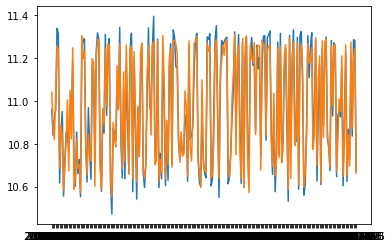

mse: 0.004
rmse: 0.062
r^2_score: 1


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


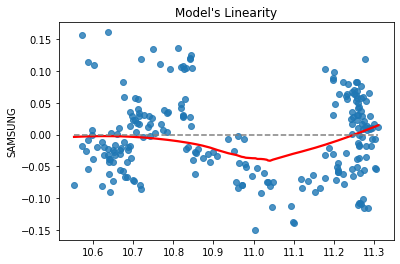

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


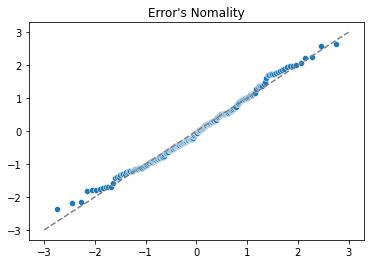

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ShapiroResult(statistic=0.9892569780349731, pvalue=0.07896758615970612)


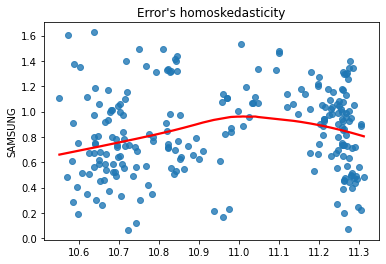

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.350e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        13:27:10   Log-Likelihood:                          1021.3
No. Observations:                 780   AIC:                                     -2033.
Df Residuals:                     775   BIC:                                     -2009.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
KOSPI                  0.8664      0.036     24.194      0.000       0.796       0.937
JPY(1YEN)              0.6436      0.166      3.876      0.000       0.318       0.970
SOX                    0.3058      0.021     14.441      0.000       0.264       0.347
USD(1$)                0.0464      0.071      0.657      0.512      -0.092       0.185
US_10year_yeild(%)    -0.0436      0.011     -4.136      0.000      -0.064      -0.023
==============================================================================
Omnibus:                       45.649   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.524
Skew:                           0.568   Prob(JB):                     4.79e-11
Kurtosis:                       2.588   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats
import statsmodels.api as sm


# SAMSUNG	NDAQ	HSI	KOSPI	N225	SOX	KR_3year_yield(%)	US_10year_yeild(%)	Gold($)	Dubai(BPD)	Brent(BPD)	WTI(BPD)	JPY(1YEN)	USD(1$)
X_train, X_test, y_train, y_test = train_test_split(log_df_features[['KOSPI','JPY(1YEN)','SOX','USD(1$)','US_10year_yeild(%)']],
                                                    log_df_target,test_size=0.3,random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
error = y_test - pred

plt.plot(y_test)
plt.plot(pred)
plt.show()

print('mse:',round(mse,3))
print('rmse:',round(rmse,3))
print('r^2_score:',round(r2_score(y_test,pred)))

sns.regplot(pred, error, lowess=True, line_kws={'color': 'red'})
plt.plot([pred.min(), pred.max()], [0, 0], '--', color='grey')
plt.title("Model's Linearity")
plt.show()

sr = scipy.stats.zscore(error)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.title("Error's Nomality")
plt.show()
print(scipy.stats.shapiro(error))

sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Error's homoskedasticity" )
plt.show()

sm.OLS(log_df_target,log_df_features[['KOSPI','JPY(1YEN)','SOX','USD(1$)','US_10year_yeild(%)']]).fit().summary()



In [15]:
sm.OLS(log_df_target,log_df_features[['KOSPI','JPY(1YEN)','SOX','USD(1$)','US_10year_yeild(%)']]).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.350e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        13:27:10   Log-Likelihood:                          1021.3
No. Observations:                 780   AIC:                                     -2033.
Df Residuals:                     775   BIC:                                     -2009.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
KOSPI                  0.8664      0.036     24.194      0.000       0.796       0.937
JPY(1YEN)              0.6436      0.166      3.876      0.000       0.318       0.970
SOX                    0.3058      0.021     14.441      0.000       0.264       0.347
USD(1$)                0.0464      0.071      0.657      0.512      -0.092       0.185
US_10year_yeild(%)    -0.0436      0.011     -4.136      0.000      -0.064      -0.023
==============================================================================
Omnibus:                       45.649   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.524
Skew:                           0.568   Prob(JB):                     4.79e-11
Kurtosis:                       2.588   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lasso모형

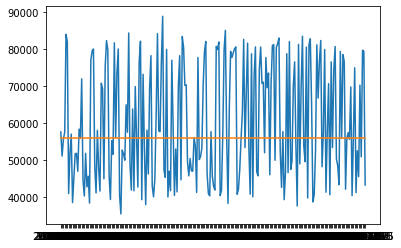

mse: 0.07
rmse: 0.265
r^2_score: 0


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


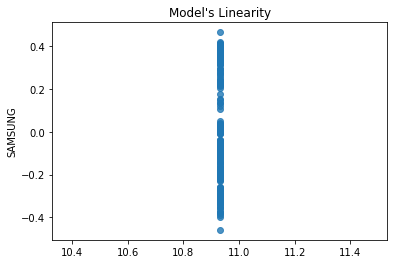

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


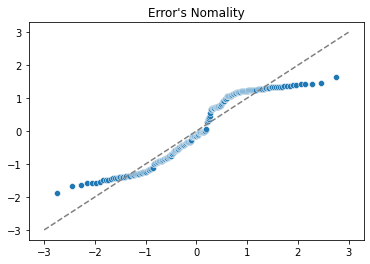

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


ShapiroResult(statistic=0.912465512752533, pvalue=1.7276989561221257e-10)


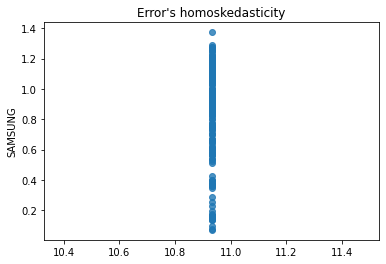

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.582e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        13:27:13   Log-Likelihood:                          1118.5
No. Observations:                 780   AIC:                                     -2227.
Df Residuals:                     775   BIC:                                     -2204.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
KOSPI                  0.3052      0.048      6.384      0.000       0.211       0.399
JPY(1YEN)             -0.2525      0.077     -3.263      0.001      -0.404      -0.101
SOX                    0.5346      0.024     22.045      0.000       0.487       0.582
US_10year_yeild(%)    -0.0888      0.008    -10.884      0.000      -0.105      -0.073
HSI                    0.4992      0.034     14.829      0.000       0.433       0.565
==============================================================================
Omnibus:                       12.430   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.682
Skew:                           0.284   Prob(JB):                      0.00176
Kurtosis:                       3.262   Cond. No.                         646.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# 코스피, 엔화, 반도체지수, 미국 10년 채권, 항셍
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats



# SAMSUNG	NDAQ	HSI	KOSPI	N225	SOX	KR_3year_yield(%)	US_10year_yeild(%)	Gold($)	Dubai(BPD)	Brent(BPD)	WTI(BPD)	JPY(1YEN)	USD(1$)
X_train, X_test, y_train, y_test = train_test_split(log_df_features[['KOSPI','JPY(1YEN)','SOX','US_10year_yeild(%)','HSI']],
                                                    log_df_target,test_size=0.3,random_state=156)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)
pred = lasso_reg.predict(X_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
error = y_test - pred



plt.plot(np.exp(y_test))
plt.plot(np.exp(pred))
plt.show()




print('mse:',round(mse,3))
print('rmse:',round(rmse,3))
print('r^2_score:',round(r2_score(y_test,pred)))

sns.regplot(pred, error, lowess=True, line_kws={'color': 'red'})
plt.plot([pred.min(), pred.max()], [0, 0], '--', color='grey')
plt.title("Model's Linearity")
plt.show()

sr = scipy.stats.zscore(error)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.title("Error's Nomality")
plt.show()
print(scipy.stats.shapiro(error))

sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Error's homoskedasticity" )
plt.show()

lasso_reg.fit(X_train,y_train).score(X_test,y_test)

sm.OLS(log_df_target,log_df_features[['KOSPI','JPY(1YEN)','SOX','US_10year_yeild(%)','HSI']]).fit().summary()

In [17]:
sm.OLS(log_df_target,log_df_features[['KOSPI','JPY(1YEN)','SOX','US_10year_yeild(%)','HSI']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.582e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        13:27:13   Log-Likelihood:                          1118.5
No. Observations:                 780   AIC:                                     -2227.
Df Residuals:                     775   BIC:                                     -2204.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
KOSPI                  0.3052      0.048      6.384      0.000       0.211       0.399
JPY(1YEN)             -0.2525      0.077     -3.263      0.001      -0.404      -0.101
SOX                    0.5346      0.024     22.045      0.000       0.487       0.582
US_10year_yeild(%)    -0.0888      0.008    -10.884      0.000      -0.105      -0.073
HSI                    0.4992      0.034     14.829      0.000       0.433       0.565
==============================================================================
Omnibus:                       12.430   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.682
Skew:                           0.284   Prob(JB):                      0.00176
Kurtosis:                       3.262   Cond. No.                         646.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ridge모형

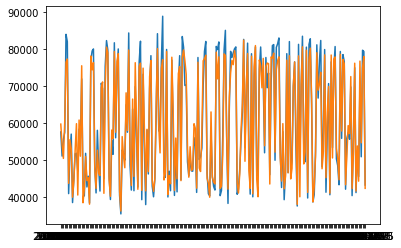

mse: 11507284.59
rmse: 3392.239
r^2_score: 1


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


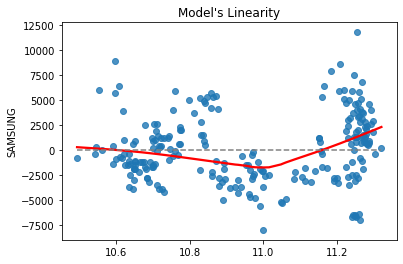

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


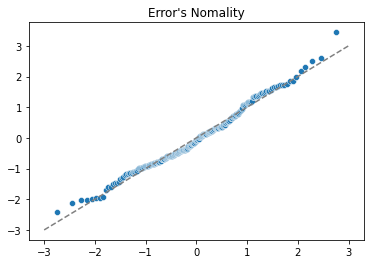

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ShapiroResult(statistic=0.9869474172592163, pvalue=0.031186694279313087)


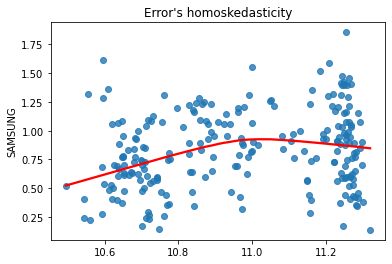

0.9529760902422897

In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats

# 코스피, 반도체지수, 니케이, 항셍, 한국 3년 채권


# SAMSUNG	NDAQ	HSI	KOSPI	N225	SOX	KR_3year_yield(%)	US_10year_yeild(%)	Gold($)	Dubai(BPD)	Brent(BPD)	WTI(BPD)	JPY(1YEN)	USD(1$)
X_train, X_test, y_train, y_test = train_test_split(log_df_features[['KOSPI','SOX','N225','HSI','KR_3year_yield(%)']],
                                                    log_df_target,test_size=0.3,random_state=156)

ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
pred = ridge_reg.predict(X_test)

mse = mean_squared_error(np.exp(y_test),np.exp(pred))
rmse = np.sqrt(mse)
error = np.exp(y_test) - np.exp(pred)

plt.plot(np.exp(y_test))
plt.plot(np.exp(pred))
plt.show()


print('mse:',round(mse,3))
print('rmse:',round(rmse,3))
print('r^2_score:',round(r2_score(y_test,pred)))

sns.regplot(pred, error, lowess=True, line_kws={'color': 'red'})
plt.plot([pred.min(), pred.max()], [0, 0], '--', color='grey')
plt.title("Model's Linearity")
plt.show()

sr = scipy.stats.zscore(error)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.title("Error's Nomality")
plt.show()
print(scipy.stats.shapiro(error))

sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Error's homoskedasticity" )
plt.show()

ridge_reg.fit(X_train,y_train).score(X_test,y_test)

In [19]:
sm.OLS(log_df_target,log_df_features[['KOSPI','SOX','N225','HSI','KR_3year_yield(%)']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.232e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        13:27:17   Log-Likelihood:                          1161.5
No. Observations:                 780   AIC:                                     -2313.
Df Residuals:                     775   BIC:                                     -2290.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
KOSPI                 0.3286      0.037      8.947      0.000       0.256       0.401
SOX                   0.5267      0.030     17.714      0.000       0.468       0.585
N225                  0.0698      0.062      1.124      0.261      -0.052       0.192
HSI                   0.3599      0.044      8.158      0.000       0.273       0.446
KR_3year_yield(%)    -0.1356      0.009    -15.676      0.000      -0.153      -0.119
==============================================================================
Omnibus:                       43.580   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.766
Skew:                           0.536   Prob(JB):                     3.48e-12
Kurtosis:                       3.688   Cond. No.                         730.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### RandomForestRegression

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- KR_3year_yield(%)
- SOX

  warnings.warn(message, FutureWarning)


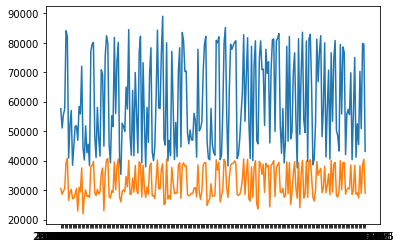

mse: 0.361
rmse: 0.601
r^2_score: -4


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


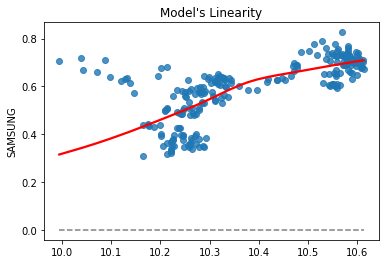

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


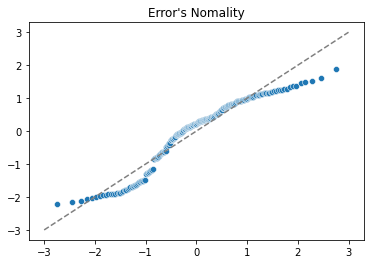

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ShapiroResult(statistic=0.9278170466423035, pvalue=2.7770616917166535e-09)


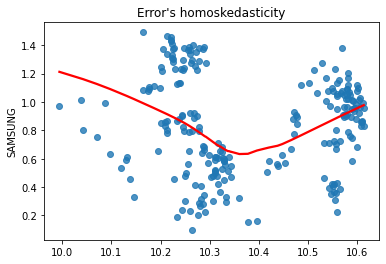

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats

# 니케이, 반도체지수, 코스피, 항셍


# SAMSUNG	NDAQ	HSI	KOSPI	N225	SOX	KR_3year_yield(%)	US_10year_yeild(%)	Gold($)	Dubai(BPD)	Brent(BPD)	WTI(BPD)	JPY(1YEN)	USD(1$)
X_train, X_test, y_train, y_test = train_test_split(log_df_features[['KOSPI','N225','HSI','KOSPI','HSI']],
                                                    log_df_target,test_size=0.3,random_state=156)

random_reg = RandomForestRegressor()
random_reg.fit(X_train,y_train)
pred = ridge_reg.predict(X_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
error = y_test - pred


plt.plot(np.exp(y_test))
plt.plot(np.exp(pred))
plt.show()


print('mse:',round(mse,3))
print('rmse:',round(rmse,3))
print('r^2_score:',round(r2_score(y_test,pred)))

sns.regplot(pred, error, lowess=True, line_kws={'color': 'red'})
plt.plot([pred.min(), pred.max()], [0, 0], '--', color='grey')
plt.title("Model's Linearity")
plt.show()

sr = scipy.stats.zscore(error)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.title("Error's Nomality")
plt.show()
print(scipy.stats.shapiro(error))

sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Error's homoskedasticity" )
plt.show()

In [21]:
sm.OLS(log_df_target,log_df_features[['KOSPI','N225','HSI','KOSPI','HSI']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.476e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        13:27:20   Log-Likelihood:                          832.19
No. Observations:                 780   AIC:                                     -1658.
Df Residuals:                     777   BIC:                                     -1644.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KOSPI          0.2612      0.023     11.260      0.000       0.216       0.307
N225           1.1224      0.059     18.941      0.000       1.006       1.239
HSI           -0.2188      0.014    -15.491      0.000      -0.247      -0.191
KOSPI          0.2612      0.023     11.260      0.000       0.216       0.307
HSI           -0.2188      0.014    -15.491      0.000      -0.247      -0.191
==============================================================================
Omnibus:                       43.272   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.971
Skew:                           0.550   Prob(JB):                     8.55e-12
Kurtosis:                       3.600   Cond. No.                     4.62e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 차원축소로 선정된 독립변수 이용

LinearRegression()
mse: 0.004
rmse: 0.061
r^2_score: 1


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


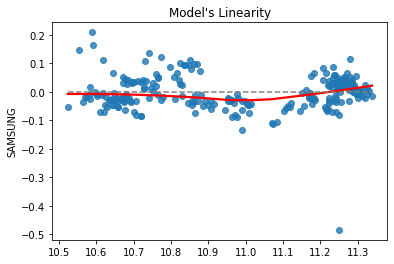

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


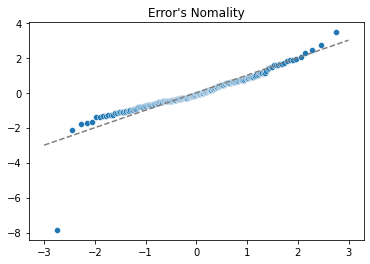

ShapiroResult(statistic=0.8700675368309021, pvalue=3.173738127772857e-13)


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


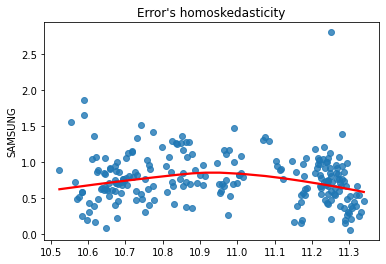

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Lasso()
mse: 0.07
rmse: 0.265
r^2_score: 0


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


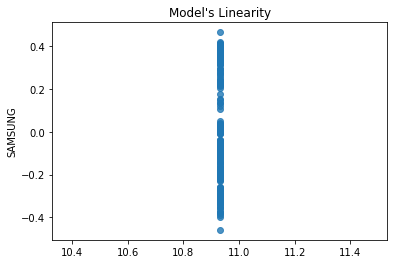

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


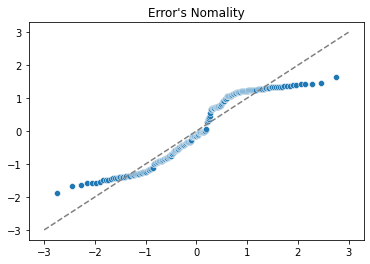

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


ShapiroResult(statistic=0.912465512752533, pvalue=1.7276989561221257e-10)


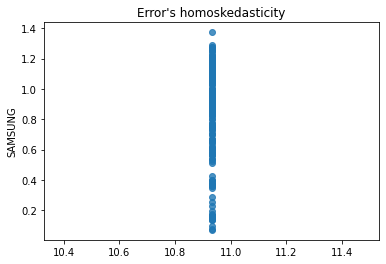

Ridge()
mse: 0.004
rmse: 0.06
r^2_score: 1


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


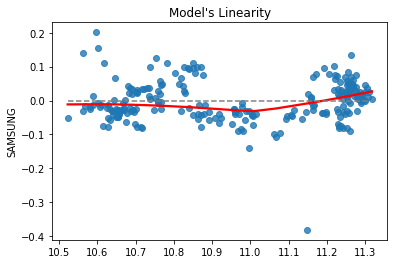

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


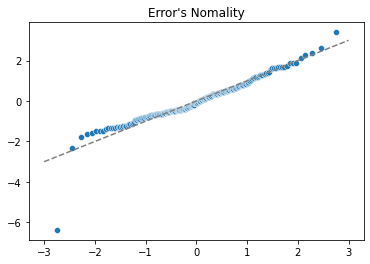

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ShapiroResult(statistic=0.9320801496505737, pvalue=6.408473307573104e-09)


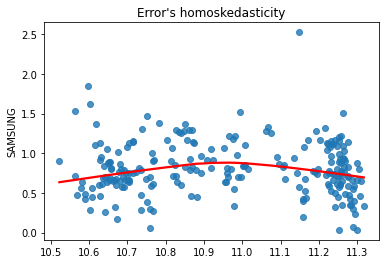

RandomForestRegressor()
mse: 0.001
rmse: 0.034
r^2_score: 1


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


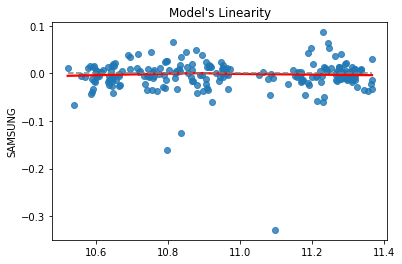

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


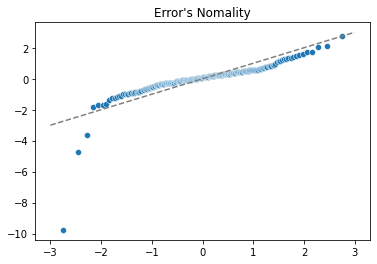

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ShapiroResult(statistic=0.692340075969696, pvalue=1.9324979595788833e-20)


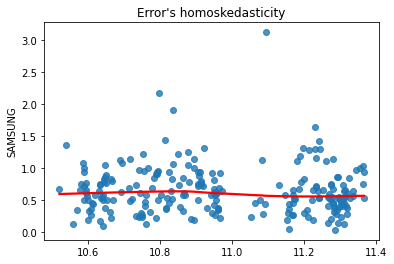

In [22]:
# pca_1

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats


X_train, X_test, y_train, y_test = train_test_split(pca_1,log_df_target,test_size=0.3,random_state=156)

lr_reg = LinearRegression()
lasso_reg = Lasso()
ridge_reg = Ridge()
random_reg = RandomForestRegressor()


model = [lr_reg,lasso_reg,ridge_reg,random_reg]

for i in model:
    i.fit(X_train,y_train)
    pred = i.predict(X_test)

    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    error = y_test - pred
    
    print(i)

    print('mse:',round(mse,3))
    print('rmse:',round(rmse,3))
    print('r^2_score:',round(r2_score(y_test,pred)))
    

    sns.regplot(pred, error, lowess=True, line_kws={'color': 'red'})
    plt.plot([pred.min(), pred.max()], [0, 0], '--', color='grey')
    plt.title("Model's Linearity")
    plt.show()

    sr = scipy.stats.zscore(error)
    (x, y), _ = scipy.stats.probplot(sr)
    sns.scatterplot(x, y)
    plt.plot([-3, 3], [-3, 3], '--', color='grey')
    plt.title("Error's Nomality")
    plt.show()
    print(scipy.stats.shapiro(error))

    sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
    plt.title("Error's homoskedasticity" )
    plt.show()

LinearRegression()
mse: 21820788.668
rmse: 4671.273
r^2_score: 1


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


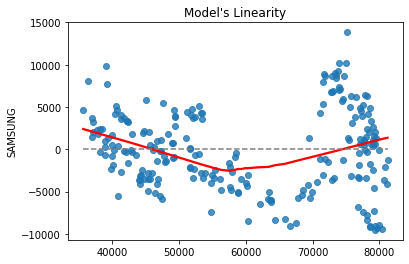

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


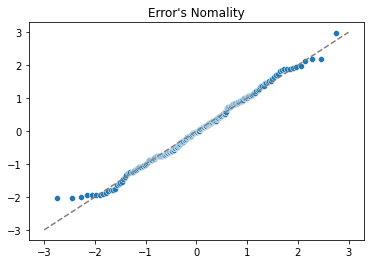

ShapiroResult(statistic=0.9906627535820007, pvalue=0.138558030128479)


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


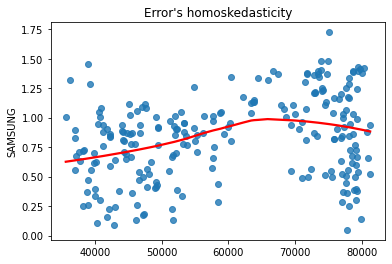

Lasso()
mse: 21877152.63
rmse: 4677.302
r^2_score: 1


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


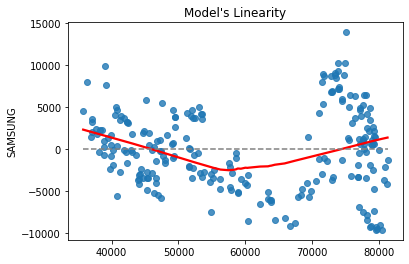

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


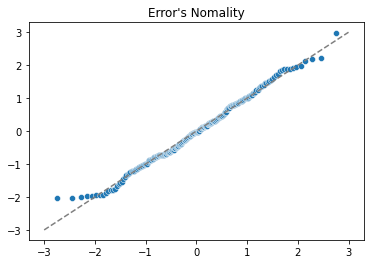

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ShapiroResult(statistic=0.9910486340522766, pvalue=0.1613437533378601)


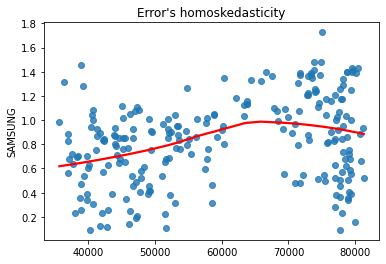

Ridge()
mse: 25292708.793
rmse: 5029.186
r^2_score: 1


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


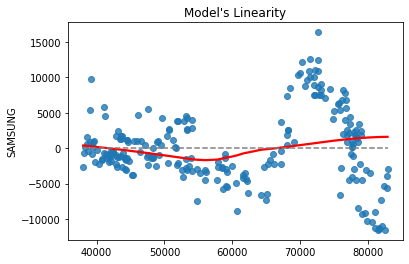

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


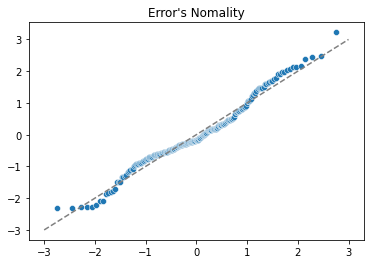

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ShapiroResult(statistic=0.9753238558769226, pvalue=0.0004181342665106058)


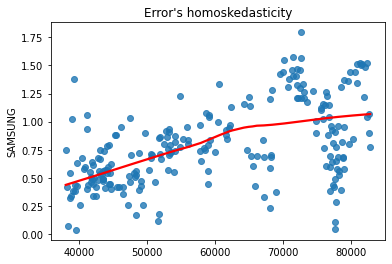

RandomForestRegressor()
mse: 2138918.551
rmse: 1462.504
r^2_score: 1


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


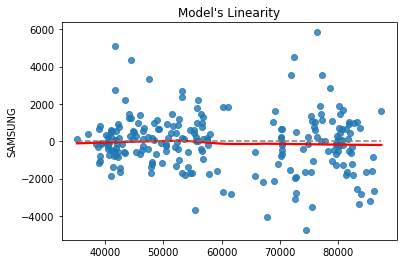

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


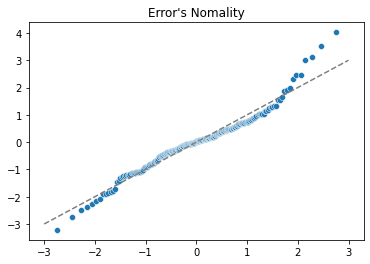

ShapiroResult(statistic=0.9613226652145386, pvalue=5.860656528966501e-06)


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


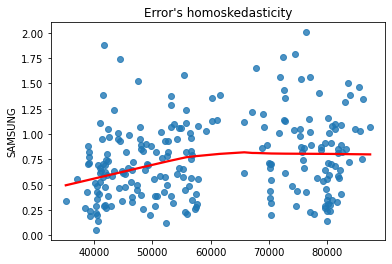

In [23]:
# pca_5

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats


X_train, X_test, y_train, y_test = train_test_split(pca_5,target,test_size=0.3,random_state=156)

lr_reg = LinearRegression()
lasso_reg = Lasso()
ridge_reg = Ridge()
random_reg = RandomForestRegressor()


model = [lr_reg,lasso_reg,ridge_reg,random_reg]

for i in model:
    i.fit(X_train,y_train)
    pred = i.predict(X_test)

    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    error = y_test - pred
    
    print(i)

    print('mse:',round(mse,3))
    print('rmse:',round(rmse,3))
    print('r^2_score:',round(r2_score(y_test,pred)))
    

    sns.regplot(pred, error, lowess=True, line_kws={'color': 'red'})
    plt.plot([pred.min(), pred.max()], [0, 0], '--', color='grey')
    plt.title("Model's Linearity")
    plt.show()

    sr = scipy.stats.zscore(error)
    (x, y), _ = scipy.stats.probplot(sr)
    sns.scatterplot(x, y)
    plt.plot([-3, 3], [-3, 3], '--', color='grey')
    plt.title("Error's Nomality")
    plt.show()
    print(scipy.stats.shapiro(error))

    sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
    plt.title("Error's homoskedasticity" )
    plt.show()

## 다항선형회귀
### 전체 자산군을 4개로 차원축소한 pca_1

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

## degree 설정: 2차 다항식

poly_pca_1 = PolynomialFeatures(degree=2)
poly_pca_1.fit(pca_1)
poly_pca_1 = poly_pca_1.transform(pca_1)
poly_pca_1

poly_pca_1 = Pipeline(memory=None,
                     steps=[('poly',
                     PolynomialFeatures(degree=2,include_bias=False)),
                    ('linear',
                      LinearRegression(copy_X=True))])

X_train, X_test, y_train, y_test = train_test_split(pca_1,log_df_target,test_size=0.3,random_state=156)

poly_pca_1.fit(X_train,y_train)
pred = poly_pca_1.predict(X_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)

print('MSE: ',mse)
print('RMSE: ',rmse)
print('R^2_score: ',r2_score(y_test,pred))

error = y_test - pred
print(scipy.stats.shapiro(error))

# plt.plot(np.exp(y_test))
# plt.plot(np.exp(pred))
# plt.show()

sm.OLS(log_df_target,pca_1).fit().summary()

MSE:  0.0013897114159640202
RMSE:  0.03727883335036144
R^2_score:  0.9798124236064792
ShapiroResult(statistic=0.9814048409461975, pvalue=0.003633372951298952)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                             0.1084
Date:                Tue, 03 May 2022   Prob (F-statistic):                       0.980
Time:                        13:27:26   Log-Likelihood:                         -2973.0
No. Observations:                 780   AIC:                                      5954.
Df Residuals:                     776   BIC:                                      5973.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feautre_1     -0.2891      0.642     -0.450      0.653      -1.550       0.972
feature_2      0.3721      0.824      0.452      0.652      -1.245       1.990
feature_3      0.1169      2.995      0.039      0.969      -5.762       5.996
feature_4      0.5657      3.534      0.160      0.873      -6.371       7.503
==============================================================================
Omnibus:                       87.631   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.933
Skew:                           0.584   Prob(JB):                     1.59e-51
Kurtosis:                       5.415   Cond. No.                         5.50
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
## degree 설정: 3차 다항식
poly_pca_1 = Pipeline(memory=None,
                     steps=[('poly',
                     PolynomialFeatures(degree=3,include_bias=False)),
                    ('linear',
                      LinearRegression(copy_X=True))])

X_train, X_test, y_train, y_test = train_test_split(pca_1,log_df_target,test_size=0.3,random_state=156)

poly_pca_1.fit(X_train,y_train)
pred = poly_pca_1.predict(X_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)

print('MSE: ',mse)
print('RMSE: ',rmse)
print('R^2_score: ',r2_score(y_test,pred))

error = y_test - pred
print(scipy.stats.shapiro(error))

sm.OLS(log_df_target,pca_1).fit().summary()


# plt.plot(np.exp(y_test))
# plt.plot(np.exp(pred))
# plt.show()

MSE:  0.16424369527397104
RMSE:  0.4052699042292322
R^2_score:  -1.3858781811887169
ShapiroResult(statistic=0.07769298553466797, pvalue=4.080955215415692e-32)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                             0.1084
Date:                Tue, 03 May 2022   Prob (F-statistic):                       0.980
Time:                        13:27:26   Log-Likelihood:                         -2973.0
No. Observations:                 780   AIC:                                      5954.
Df Residuals:                     776   BIC:                                      5973.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feautre_1     -0.2891      0.642     -0.450      0.653      -1.550       0.972
feature_2      0.3721      0.824      0.452      0.652      -1.245       1.990
feature_3      0.1169      2.995      0.039      0.969      -5.762       5.996
feature_4      0.5657      3.534      0.160      0.873      -6.371       7.503
==============================================================================
Omnibus:                       87.631   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.933
Skew:                           0.584   Prob(JB):                     1.59e-51
Kurtosis:                       5.415   Cond. No.                         5.50
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 금을 별도의 자산군으로 분류한 pca_5 선택

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

## degree 설정: 2차 다항식

poly_pca_5 = PolynomialFeatures(degree=2)
poly_pca_5.fit(pca_5)
poly_pca_5 = poly_pca_5.transform(pca_5)
poly_pca_5

poly_pca_5 = Pipeline(memory=None,
                     steps=[('poly',
                     PolynomialFeatures(degree=2,include_bias=False)),
                    ('linear',
                      LinearRegression(copy_X=True))])

X_train, X_test, y_train, y_test = train_test_split(pca_5,log_df_target,test_size=0.3,random_state=156)

poly_pca_5.fit(X_train,y_train)
pred = poly_pca_5.predict(X_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)

print('MSE: ',mse)
print('RMSE: ',rmse)
print('R^2_score: ',r2_score(y_test,pred))

error = y_test - pred
print(scipy.stats.shapiro(error))

print(sm.OLS(log_df_target,pca_5).fit().summary())
print(sm.OLS(log_df_target,pca_5).fit().summary())

# plt.plot(np.exp(y_test))
# plt.plot(np.exp(pred))
# plt.show()


MSE:  0.0019853759275684627
RMSE:  0.044557557468609774
R^2_score:  0.9711595315781135
ShapiroResult(statistic=0.98470139503479, pvalue=0.012813009321689606)
                                 OLS Regression Results                                
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.117e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        13:27:26   Log-Likelihood:                          891.25
No. Observations:                 780   AIC:                                     -1772.
Df Residuals:                     775   BIC:                                     -1749.
Df Model:                           5                                                  
Covariance Type:            nonrobust             

In [27]:
sm.OLS(log_df_target,pca_5).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.117e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        13:27:26   Log-Likelihood:                          891.25
No. Observations:                 780   AIC:                                     -1772.
Df Residuals:                     775   BIC:                                     -1749.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
STOCK         -0.2216      0.010    -22.774      0.000      -0.241      -0.203
BILL          -0.2021      0.013    -15.904      0.000      -0.227      -0.177
Gold($)        1.4780      0.000   3946.589      0.000       1.477       1.479
GOODS          0.0491      0.012      4.158      0.000       0.026       0.072
EXCHANGE      -1.1028      0.085    -12.994      0.000      -1.269      -0.936
==============================================================================
Omnibus:                        2.807   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                2.790
Skew:                          -0.082   Prob(JB):                        0.248
Kurtosis:                       3.243   Cond. No.                         227.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

## degree 설정: 3
poly_pca_5 = PolynomialFeatures(degree=2)
poly_pca_5.fit(pca_5)
poly_pca_5 = poly_pca_5.transform(pca_5)
poly_pca_5

poly_pca_5 = Pipeline(memory=None,
                     steps=[('poly',
                     PolynomialFeatures(degree=3,include_bias=False)),
                    ('linear',
                      LinearRegression(copy_X=True))])

X_train, X_test, y_train, y_test = train_test_split(pca_5,log_df_target,test_size=0.3,random_state=156)

poly_pca_5.fit(X_train,y_train)
pred = poly_pca_5.predict(X_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)

print('MSE: ',mse)
print('RMSE: ',rmse)
print('R^2_score: ',r2_score(y_test,pred))

error = y_test - pred
print(scipy.stats.shapiro(error))

sm.OLS(log_df_target,pca_5).fit().summary()


# plt.plot(np.exp(y_test))
# plt.plot(np.exp(pred))
# plt.show()

MSE:  0.001079299240086704
RMSE:  0.032852689997726274
R^2_score:  0.9843216112277491
ShapiroResult(statistic=0.9753181338310242, pvalue=0.000417327944887802)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.117e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        13:27:26   Log-Likelihood:                          891.25
No. Observations:                 780   AIC:                                     -1772.
Df Residuals:                     775   BIC:                                     -1749.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
STOCK         -0.2216      0.010    -22.774      0.000      -0.241      -0.203
BILL          -0.2021      0.013    -15.904      0.000      -0.227      -0.177
Gold($)        1.4780      0.000   3946.589      0.000       1.477       1.479
GOODS          0.0491      0.012      4.158      0.000       0.026       0.072
EXCHANGE      -1.1028      0.085    -12.994      0.000      -1.269      -0.936
==============================================================================
Omnibus:                        2.807   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                2.790
Skew:                          -0.082   Prob(JB):                        0.248
Kurtosis:                       3.243   Cond. No.                         227.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 결론(????)
* 회귀 모형이 의미 없는 것은 알겠는데 통계 자료를 어떻게 해석해야할지 모르겠다.

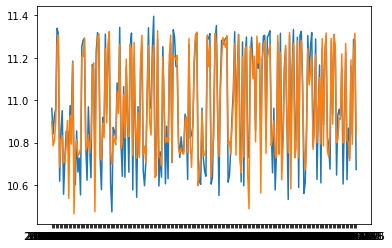

mse: 0.009
rmse: 0.096
r^2_score: 1


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


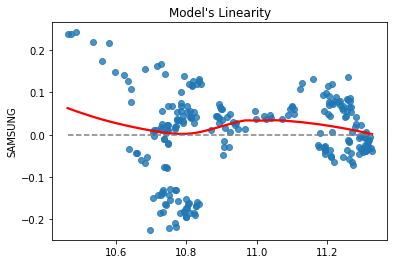

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


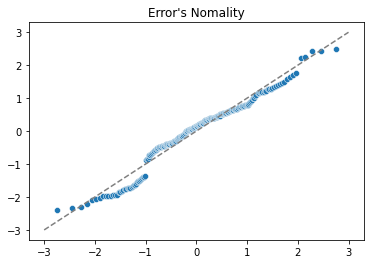

C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ShapiroResult(statistic=0.961942732334137, pvalue=6.956502147659194e-06)


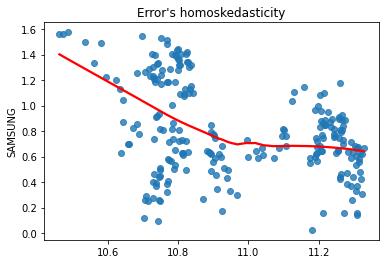

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                SAMSUNG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.110e+06
Date:                Tue, 03 May 2022   Prob (F-statistic):                        0.00
Time:                        19:25:50   Log-Likelihood:                          679.87
No. Observations:                 780   AIC:                                     -1358.
Df Residuals:                     779   BIC:                                     -1353.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KOSPI          1.4033      0.000   3018.282      0.000       1.402       1.404
==============================================================================
Omnibus:                       11.964   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.909
Skew:                           0.245   Prob(JB):                      0.00157
Kurtosis:                       3.396   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats
import statsmodels.api as sm


# SAMSUNG	NDAQ	HSI	KOSPI	N225	SOX	KR_3year_yield(%)	US_10year_yeild(%)	Gold($)	Dubai(BPD)	Brent(BPD)	WTI(BPD)	JPY(1YEN)	USD(1$)
X_train, X_test, y_train, y_test = train_test_split(log_df_features[['KOSPI']],
                                                    log_df_target,test_size=0.3,random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
error = y_test - pred

plt.plot(y_test)
plt.plot(pred)
plt.show()

print('mse:',round(mse,3))
print('rmse:',round(rmse,3))
print('r^2_score:',round(r2_score(y_test,pred)))

sns.regplot(pred, error, lowess=True, line_kws={'color': 'red'})
plt.plot([pred.min(), pred.max()], [0, 0], '--', color='grey')
plt.title("Model's Linearity")
plt.show()

sr = scipy.stats.zscore(error)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.title("Error's Nomality")
plt.show()
print(scipy.stats.shapiro(error))

sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Error's homoskedasticity" )
plt.show()

sm.OLS(log_df_target,log_df_features[['KOSPI']]).fit().summary()

